In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
import pickle
import pandas as pd

data= pd.read_csv('/content/drive/MyDrive/ME683/Merged_dataset/merged_data_polymer.csv')

In [ ]:
X = data[['rho','r','h', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
Y = data[['E', 'mu']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [ ]:
Y

E     mu
0       1.000  0.400
1       1.380  0.420
2       2.800  0.400
3       6.000  0.350
4       0.800  0.490
...       ...    ...
176988  2.862  0.428
176989  0.785  0.409
176990  2.719  0.370
176991  5.545  0.408
176992  2.654  0.380

[176993 rows x 2 columns]

In [ ]:
xgb_model = XGBRegressor(n_estimators=150000, random_state=42, learning_rate=0.003)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

Mean Squared Error for E: 0.34858259029039984
Mean Squared Error for mu: 0.0009132655830070909


In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
# results_df['Actual_mu'] /= 10000
# results_df['Predicted_mu'] /= 10000
# results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')

import numpy as np
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
from scipy import stats
results_df['Percentage_Error_E_Rounded'] = results_df['Percentage_Error_E'].round(0)
results_df['Percentage_Error_mu_Rounded'] = results_df['Percentage_Error_mu'].round(1)
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E_Rounded'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu_Rounded'])
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(results_df)

Mean Absolute Error for E: 0.4060527603422855
Mean Absolute Error for mu: 0.024470765112887663
Standard Deviation for E: 0.42872787663750295
Standard Deviation for mu: 0.017737671550396798
Mean Absolute percentage Error for E: 12.313695883734477
Mean Absolute percentage Error for mu: 5.97826652959867
Mode Percentage Error for E: ModeResult(mode=1.0, count=122) 
Mode Percentage Error for E: ModeResult(mode=1.4, count=27) 
      Actual_E  Predicted_E   Error_E  Actual_mu  Predicted_mu  Error_mu  \
0        2.974     3.407604  0.433604      0.382      0.374911  0.007089   
1        6.177     6.307246  0.130246      0.399      0.419167  0.020167   
2        7.175     7.035775  0.139225      0.394      0.405207  0.011207   
3        0.992     1.118670  0.126670      0.417      0.407045  0.009955   
4        5.588     5.563555  0.024445      0.394      0.410808  0.016808   
...        ...          ...       ...        ...           ...       ...   
1765     0.798     0.866845  0.068845      

Median Percentage Error for E: 8.866797397792887
Median Percentage Error for mu: 5.248228483127822
Mean Absolute Error for E: 0.4060527603422855
Mean Absolute Error for mu: 0.024470765112887663
Standard Deviation for E: 0.42872787663750295
Standard Deviation for mu: 0.017737671550396798


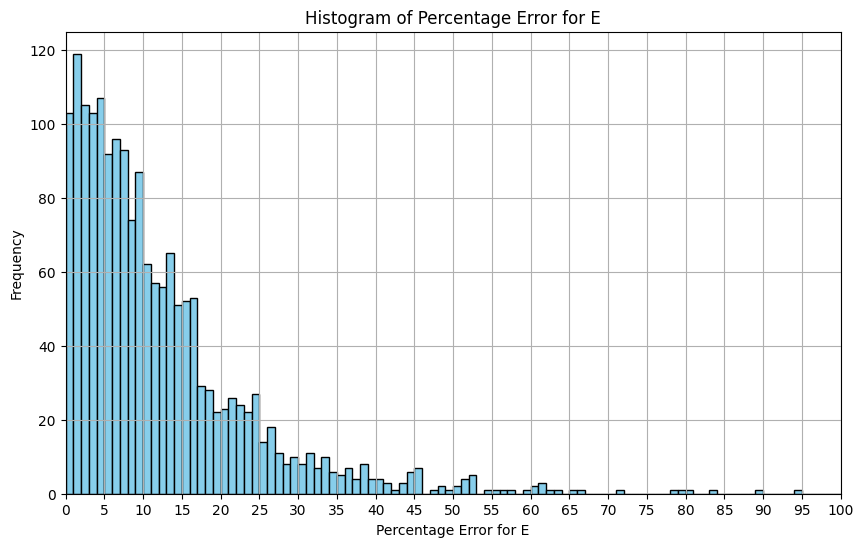

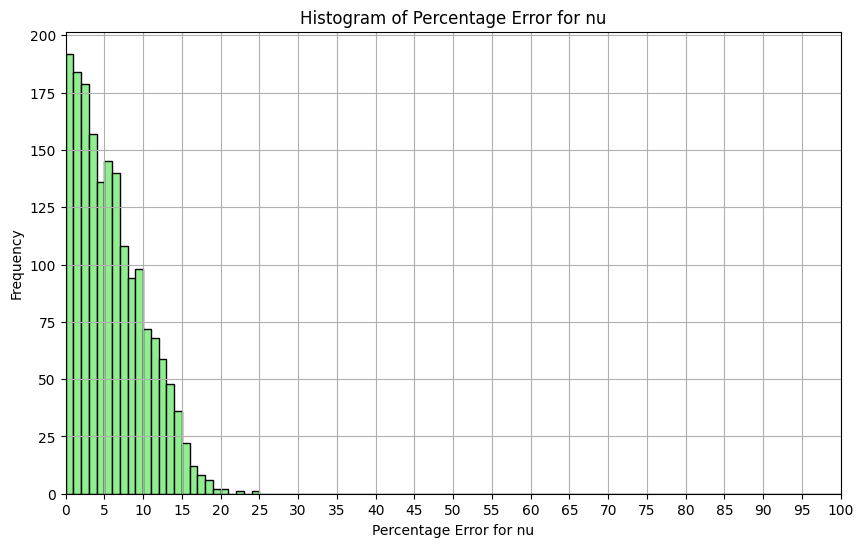

Maximum Percentage Error for E: 140.97772493754348
Minimum Percentage Error for E: 0.00823939357151788
Maximum Percentage Error for mu: 24.26249244633842
Minimum Percentage Error for mu: 0.004139103865264683


In [ ]:
import matplotlib.pyplot as plt

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
results_df.to_csv('prediction_results_ceramic_xgb.csv', index=False)
# from google.colab import files

# # Path to the file you want to download
# file_path = 'prediction_results_ceramic_xgb.csv'

# # Trigger the download
# files.download(file_path)

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for nu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for nu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()
# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [ ]:
import joblib

# Assuming model is your trained machine learning model
# Replace 'model.pkl' with the desired filename
joblib.dump(xgb_model, 'polymers_xgb_no_scale_merge.pkl')
from google.colab import files

# Download the model file
files.download('polymers_xgb_no_scale_merge.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Scaled**

---



In [ ]:


# Assuming dataf is your DataFrame
data['E'] *= 100
data['mu'] *= 10000
X = data[['rho','r','h', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
Y = data[['E', 'mu']]
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [ ]:
Y

E      mu
0       100.0  4000.0
1       138.0  4200.0
2       280.0  4000.0
3       600.0  3500.0
4        80.0  4900.0
...       ...     ...
176988  286.2  4280.0
176989   78.5  4090.0
176990  271.9  3700.0
176991  554.5  4080.0
176992  265.4  3800.0

[176993 rows x 2 columns]

In [10]:
xgb_model = XGBRegressor(n_estimators=100000, random_state=42, learning_rate=0.003)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

Mean Squared Error for E: 3535.1573181343388
Mean Squared Error for mu: 91903.51490865606


In [11]:
import pandas as pd

results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
results_df['Actual_E'] /= 100
results_df['Predicted_E'] /= 100
results_df['Error_E'] /= 100
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')

import numpy as np
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
from scipy import stats
results_df['Percentage_Error_E_Rounded'] = results_df['Percentage_Error_E'].round(0)
results_df['Percentage_Error_mu_Rounded'] = results_df['Percentage_Error_mu'].round(1)
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E_Rounded'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu_Rounded'])
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(results_df)

Mean Absolute Error for E: 0.40754899278629975
Mean Absolute Error for mu: 0.0246041722529352
Standard Deviation for E: 0.4330421421763994
Standard Deviation for mu: 0.017715732319627107
Mean Absolute percentage Error for E: 12.25290676631836
Mean Absolute percentage Error for mu: 6.010973887990094
Mode Percentage Error for E: ModeResult(mode=1.0, count=116) 
Mode Percentage Error for E: ModeResult(mode=0.6, count=28) 
      Actual_E  Predicted_E   Error_E  Actual_mu  Predicted_mu  Error_mu  \
0        2.974     3.284903  0.310903      0.382      0.385055  0.003055   
1        6.177     6.394732  0.217731      0.399      0.412316  0.013316   
2        7.175     6.922191  0.252809      0.394      0.405874  0.011874   
3        0.992     1.049635  0.057635      0.417      0.409735  0.007265   
4        5.588     5.632592  0.044592      0.394      0.408413  0.014413   
...        ...          ...       ...        ...           ...       ...   
1765     0.798     0.873998  0.075998      0.

Median Percentage Error for E: 8.925771308172546
Median Percentage Error for mu: 5.208616415895056
Mean Absolute Error for E: 0.40754899278629975
Mean Absolute Error for mu: 0.0246041722529352
Standard Deviation for E: 0.4330421421763994
Standard Deviation for mu: 0.017715732319627107


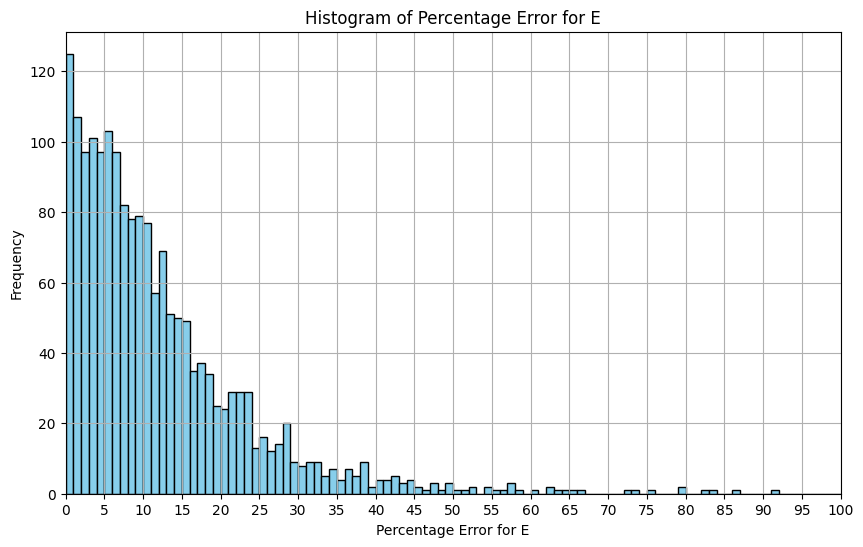

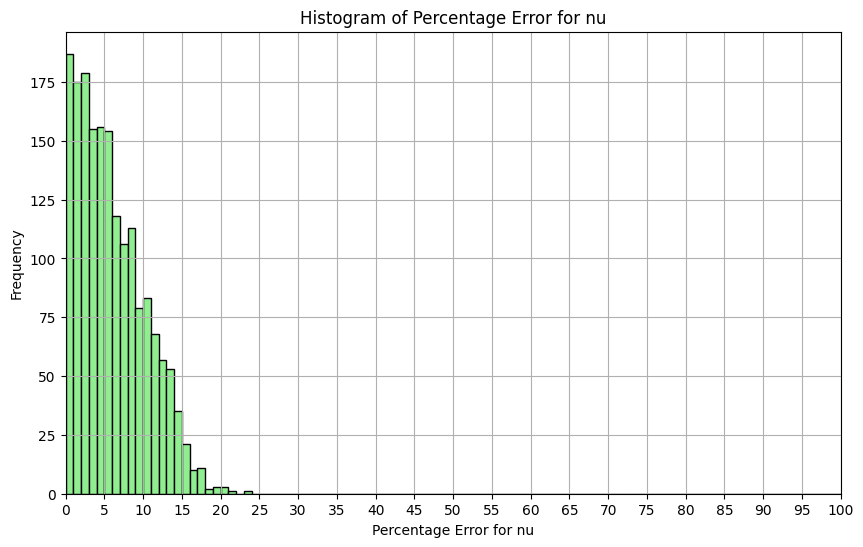

Maximum Percentage Error for E: 142.8860808072025
Minimum Percentage Error for E: 0.002682666159660767
Maximum Percentage Error for mu: 23.146355124080866
Minimum Percentage Error for mu: 1.2782231675392672e-05


In [12]:
import matplotlib.pyplot as plt

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
results_df.to_csv('prediction_results_ceramic_xgb.csv', index=False)
# from google.colab import files

# # Path to the file you want to download
# file_path = 'prediction_results_ceramic_xgb.csv'

# # Trigger the download
# files.download(file_path)

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for nu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for nu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()
# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [13]:
import joblib

# Assuming model is your trained machine learning model
# Replace 'model.pkl' with the desired filename
joblib.dump(xgb_model, 'polymers_xgb_scale_merge.pkl')
from google.colab import files

# Download the model file
files.download('polymers_xgb_scale_merge.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **only nu scaled**

In [ ]:


# Assuming dataf is your DataFrame
data['E'] /= 100
data['mu'] *= 10000
X = data[['rho','r','h', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
Y = data[['E', 'mu']]
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [ ]:
y_train

In [16]:
xgb_model = XGBRegressor(n_estimators=80000, random_state=42, learning_rate=0.003)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

Mean Squared Error for E: 0.3554781241441353
Mean Squared Error for mu: 9183828384660.42


In [17]:
import pandas as pd

results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')

import numpy as np
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
from scipy import stats
results_df['Percentage_Error_E_Rounded'] = results_df['Percentage_Error_E'].round(0)
results_df['Percentage_Error_mu_Rounded'] = results_df['Percentage_Error_mu'].round(1)
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E_Rounded'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu_Rounded'])
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(results_df)

Mean Absolute Error for E: 0.41329570561923545
Mean Absolute Error for mu: 246.62162779661014
Standard Deviation for E: 0.4298478489235896
Standard Deviation for mu: 176.16353099053237
Mean Absolute percentage Error for E: 12.464561560844624
Mean Absolute percentage Error for mu: 6.023914571751873
Mode Percentage Error for E: ModeResult(mode=1.0, count=115) 
Mode Percentage Error for E: ModeResult(mode=1.6, count=27) 
      Actual_E  Predicted_E   Error_E  Actual_mu  Predicted_mu  Error_mu  \
0        2.974     3.196056  0.222056     3820.0   3813.267090    6.7328   
1        6.177     6.272507  0.095507     3990.0   4134.099609  144.0996   
2        7.175     6.884250  0.290750     3940.0   4087.819580  147.8196   
3        0.992     1.045963  0.053963     4170.0   4042.305176  127.6948   
4        5.588     5.292542  0.295458     3940.0   4142.400879  202.4008   
...        ...          ...       ...        ...           ...       ...   
1765     0.798     0.897472  0.099472     3990

Median Percentage Error for E: 9.345028325091757
Median Percentage Error for mu: 5.21335400661981
Mean Absolute Error for E: 0.41329570561923545
Mean Absolute Error for mu: 246.62162779661014
Standard Deviation for E: 0.4298478489235896
Standard Deviation for mu: 176.16353099053237


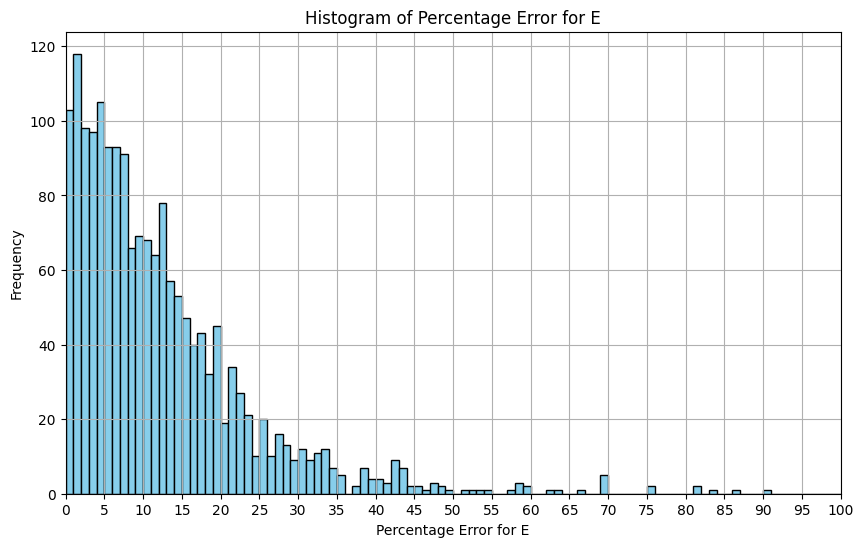

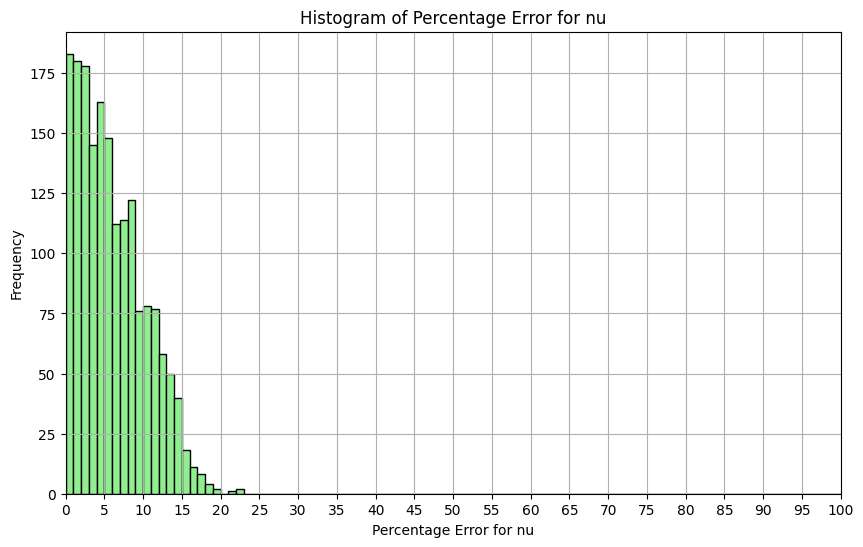

Maximum Percentage Error for E: 148.94495532937248
Minimum Percentage Error for E: 0.0030515042880863677
Maximum Percentage Error for mu: 22.632470588235265
Minimum Percentage Error for mu: 0.0061431870669745965


In [18]:
import matplotlib.pyplot as plt

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
results_df.to_csv('prediction_results_ceramic_xgb.csv', index=False)
# from google.colab import files

# # Path to the file you want to download
# file_path = 'prediction_results_ceramic_xgb.csv'

# # Trigger the download
# files.download(file_path)

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for nu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for nu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()
# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [19]:
import joblib

# Assuming model is your trained machine learning model
# Replace 'model.pkl' with the desired filename
joblib.dump(xgb_model, 'polymers_xgb_nu_scale_merge.pkl')
from google.colab import files

# Download the model file
files.download('polymers_xgb_nu_scale_merge.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>